#### Project Title: Current Health Expenditure (Percentage of GDP and Per Capita in Current USD) <br>Capstone Project by Muhamad Nur Ikmal bin Mohd Said (28/06/24)

## Dataset Explaination
* I have gathered two datasets related to SDG 3: Good Health and Well-being which are "Current health expenditure (percentage of GDP)" and "Current health expenditure per capita (current USD)".

* They are sourced from World Development Indicators (WDI) – A highly reputable source maintained by the World Bank.

* These datasets provide time-series data on health expenditures for a wide range of countries and regions.
  
* Links to download these datasets:
  * [Current health expenditure (% of GDP)](https://data.worldbank.org/indicator/SH.XPD.CHEX.GD.ZS)
  
  * [Current health expenditure per capita (current US$)](https://data.worldbank.org/indicator/SH.XPD.CHEX.PC.CD)

## Key Features

**Dataset 1: "Current health expenditure (% of GDP)"**

* This dataset presents the percentage of a country's Gross Domestic Product (GDP) that is allocated to healthcare expenditures annually. This metric reflects the relative prioritization of healthcare within a nation's overall economy.


**Dataset 2: "Current health expenditure per capita (current US$)"**

* This dataset shows the average amount of money spent on healthcare per person within a country, expressed in current US dollars. This provides a measure of the financial resources invested in each individual's health.

## Available Variables

- Country Name: The name of the country or region.
  
- Country Code: A unique three-letter code representing the country.
- Indicator Name: A clear description of the indicator being measured (either per capita expenditure in USD or expenditure as a percentage of GDP).
- Indicator Code: A code that uniquely identifies the indicator within the WDI database.
- Years (1960 - 2023): Data on health expenditures across the years, though data availability varies by country.

## Problem Statement

* Inequalities in Health Expenditure

  * Significant disparities in health expenditure per capita exist across income groups and regions, impacting health outcomes and hindering progress towards SDG 3 (Good Health and Well-being).

  * Addressing this inequality is crucial for ensuring healthy lives and well-being for all.

* Impact of Economic Development on Health Expenditure

  * The level of economic development (GDP) influences a country's health expenditure as a percentage of GDP.

  * Understanding this relationship is vital for developing strategies to increase health spending in low and middle-income countries to support SDG 3.

## Data Cleanup Process
* Both datasets have a significant number of missing values, especially for earlier years (1960-1990) and the most recent years (2020-2023). This is common in time-series data, as data collection might not have been consistent across all years and countries.
  
* The datasets appear to use blank cells ("") to represent missing values. For data analysis, it's generally better to replace these blanks with a standard missing value representation like NaN (Not a Number).
  
* The following steps are going to process the original GDP (__gdp_df__) and Capita (__capita_df__) dataset using the Pandas library.

    * First, the dataset is loaded into a DataFrame, skipping the first four rows.

    * The first column is renamed to 'country_name' and columns with indices 1, 2, and 3 are removed.
  
    * Rows with all NaN values in the year columns are dropped and columns with all NaN values are also removed.
  
    * The last column is dropped due to insufficient data and all remaining missing values are replaced with NaN.
  
    * Finally, the cleaned DataFrame is exported to a new CSV file.

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset into dataframe
gdp_df = pd.read_csv("original_gdp_dataset.csv", skiprows=4)

# Rename column 0 to country_name
gdp_df = gdp_df.rename(columns={gdp_df.columns[0]: 'country_name'})

# Remove columns by index
gdp_df = gdp_df.drop(gdp_df.columns[[1, 2, 3]], axis=1)

# Select the year columns
year_columns = gdp_df.columns[1:]

# Drop rows where all year columns are NaN
gdp_df = gdp_df.dropna(subset=year_columns, how='all')

# Drop columns where all values are NaN
gdp_df = gdp_df.dropna(axis=1, how='all')

# Drop the last column "2022" - not enough data
gdp_df = gdp_df.drop(columns=gdp_df.columns[-1])

# Replace all missing values with NaN
gdp_df = gdp_df.fillna(pd.NA)

# Export the cleaned DataFrame to a new CSV file
gdp_df.to_csv("cleaned_gdp_dataset.csv", index=False)

In [148]:
# Load the dataset into dataframe
capita_df = pd.read_csv("original_capita_dataset.csv", skiprows=4)

# Rename column 0 to country_name
capita_df = capita_df.rename(columns={capita_df.columns[0]: 'country_name'})

# Remove columns by index
capita_df = capita_df.drop(capita_df.columns[[1, 2, 3]], axis=1)

# Select the year columns
year_columns = capita_df.columns[1:]

# Drop rows where all year columns are NaN
capita_df = capita_df.dropna(subset=year_columns, how='all')

# Drop columns where all values are NaN
capita_df = capita_df.dropna(axis=1, how='all')

# Drop the last column "2022" - not enough data
capita_df = capita_df.drop(columns=capita_df.columns[-1])

# Replace all missing values with NaN
capita_df = capita_df.fillna(pd.NA)

# Export the cleaned DataFrame to a new CSV file
capita_df.to_csv("cleaned_capita_dataset.csv", index=False)

## Data Manipulation Process

  * First, I will load a cleaned health expenditure dataset and perform similar manipulations to categorize countries' rating based on their average spending.
  
  * The first cell works with GDP percentage data, calculating the average health expenditure as a percentage of GDP for each country and then assigning a rating based on predefined range bins.

  * The second cell focuses on per capita expenditure, calculating the average spending per person and assigning ratings using different range bins specific to the USD values.
  
  * Finally, both snippets export the modified dataframes with the new "average" and "rating" columns to new CSV files.

In [149]:
# Load cleaned dataset into dataframe
gdp_df = pd.read_csv('cleaned_gdp_dataset.csv')

# Calculate the average and add to a new column
gdp_df['average_expenditure_by_gdp'] = gdp_df.iloc[:, 1:].mean(axis=1, skipna=True)

# Specify rating from average expenditure (% of gdp) and add to a new column
gdp_df['rating_by_gdp'] = pd.cut(gdp_df['average_expenditure_by_gdp'], bins=[0, 5, 9, 15, float('inf')], labels=['Low', 'Moderate', 'High', 'Very High'])

# Export the manipulated dataframe to a new CSV file
gdp_df.to_csv("manipulated_gdp_dataset.csv", index=False)

In [150]:
# Load cleaned dataset into dataframe
capita_df = pd.read_csv('cleaned_capita_dataset.csv')

# Calculate the average and add to a new column
capita_df['average_expenditure_per_capita'] = capita_df.iloc[:, 1:].mean(axis=1, skipna=True)

# Specify rating from average expenditure per capita (current USD) and add to a new column
capita_df['rating_by_capita'] = pd.cut(capita_df['average_expenditure_per_capita'], bins=[0, 500, 1100, 1700, float('inf')], labels=['Low', 'Moderate', 'High', 'Very High'])

# Export the manipulated dataframe to a new CSV file
capita_df.to_csv("manipulated_capita_dataset.csv", index=False)

## Data Visualization Process

Five types of charts/graphs have been chosen to conduct exploratory data analysis for both datasets. These charts/graphs are:

-   Pie Chart
  
-   Bar Chart
  
-   Line Graph
  
-   Stacked Area Chart
  
-   Scatter Plot

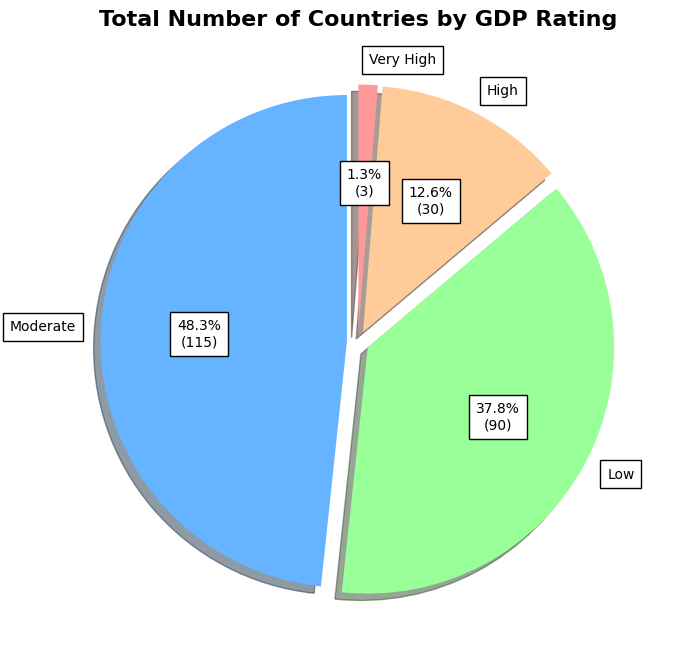

In [151]:
# GDP Pie Chart
gdp_counts = gdp_df['rating_by_gdp'].value_counts()
plt.figure(figsize=(12, 8))

# Custom colors for pie slices
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999', '#c2c2f0']

def make_autopct(values):
  def my_autopct(pct):
    total = sum(values)
    val = int(round(pct * total / 100.0))
    return '{p:.1f}%\n({v:d})'.format(p=pct, v=val)
  return my_autopct

plt.pie(gdp_counts, labels=gdp_counts.index, 
        autopct=make_autopct(gdp_counts), startangle=90, 
        textprops={'bbox': {'facecolor': 'white', 'pad': 5}},
        colors=colors, shadow=True, explode=[0.045]*len(gdp_counts))
plt.title('Total Number of Countries by GDP Rating', fontsize=16, fontweight='bold')
plt.show()

**1. Pie Chart: Total Number of Countries by GDP Rating**

* This visualization shows the distribution of countries across different GDP rating categories (High, Moderate, Low, Very High).

* A large proportion of countries fall into the "Low" and "Moderate" GDP rating categories. This suggests that a significant number of countries have limited economic resources, which likely translates to lower overall health expenditure.

* The chart highlights the economic disparities between countries, supporting the problem statement that inequalities in health expenditure exist. Lower GDP ratings often indicate lower government revenue and thus less potential for public health funding. This directly impacts a country's ability to provide adequate healthcare services and achieve SDG 3 targets.

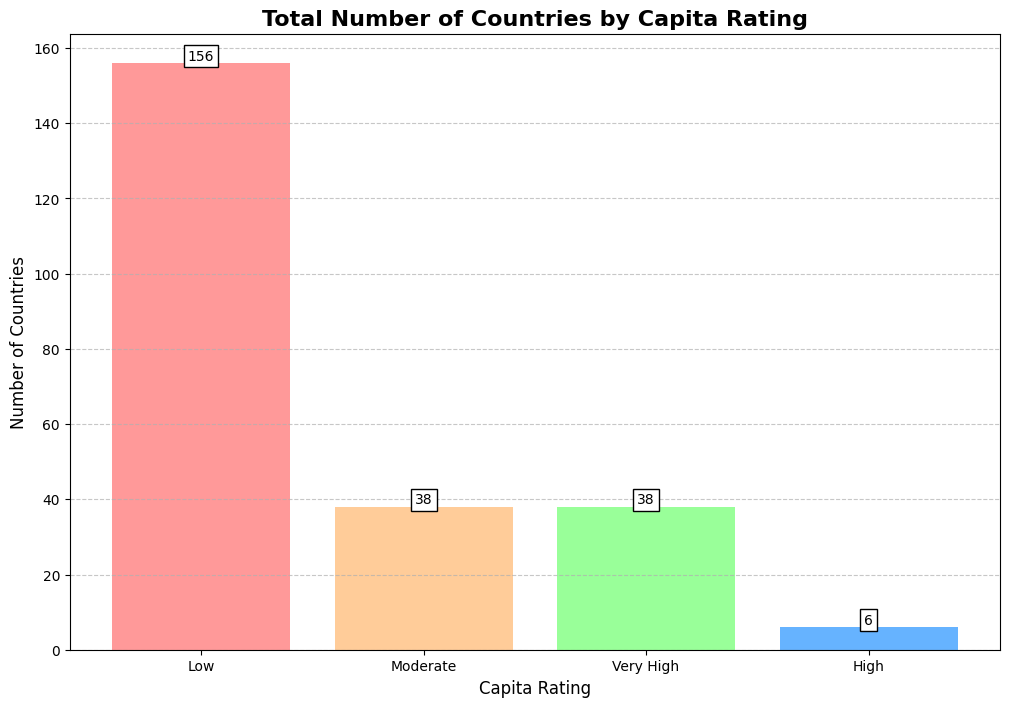

In [152]:
# Capita Bar Chart
capita_counts = capita_df['rating_by_capita'].value_counts()
plt.figure(figsize=(12, 8))

# Custom colors for bars
colors = ['#ff9999', '#ffcc99', '#99ff99', '#66b3ff']

bars = plt.bar(capita_counts.index, capita_counts.values, color=colors)
plt.title('Total Number of Countries by Capita Rating', fontsize=16, fontweight='bold')
plt.xlabel('Capita Rating', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)

# Add values on top of bars with white background
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), 
           ha='center', va='bottom', 
           bbox={'facecolor': 'white', 'pad': 3})

# Grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**2. Bar Chart: Total Number of Countries by Capita Rating**

* This chart presents the number of countries classified by their average health expenditure per capita rating (Very High, High, Moderate, Low).

* A majority of countries fall into the "Low" capita rating category, indicating low average health spending per person. This reinforces the problem statement about inequalities in health expenditure, now focusing on the per capita level.

* This chart directly visualizes the disparity in per capita health spending. A high number of countries in the "Low" category suggests limited access to essential healthcare services, impacting health outcomes and hindering progress towards SDG 3. This disparity likely contributes to inequalities in health outcomes between these countries and their higher-spending counterparts.

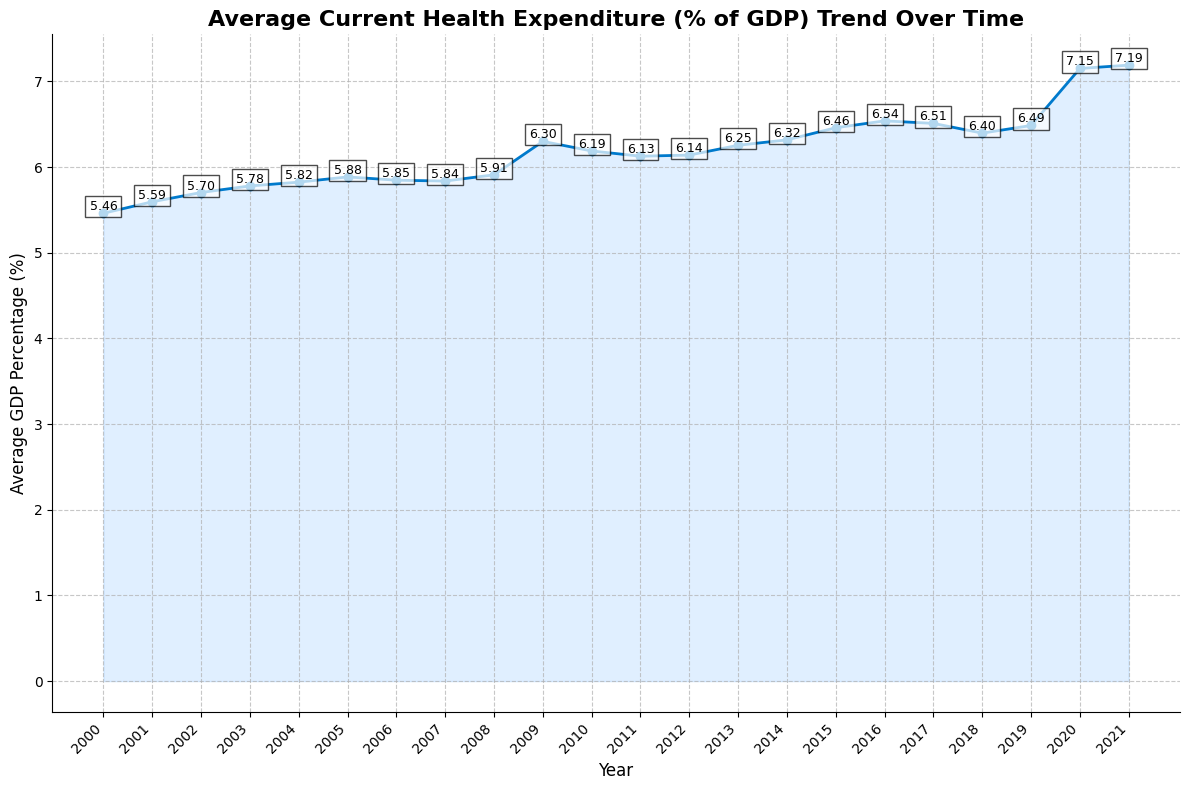

In [153]:
# Average GDP Line Graph

# Extract years as integers
years = gdp_df.columns[1:23].astype(int)  

# Calculate mean for each year
average_gdp = gdp_df.iloc[:, 1:23].mean(skipna=True)

plt.figure(figsize=(12, 8))
plt.plot(average_gdp.index, average_gdp.values, marker='o', linestyle='-', color='#007acc', linewidth=2)

# Title and labels
plt.title('Average Current Health Expenditure (% of GDP) Trend Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average GDP Percentage (%)', fontsize=12)

# Rotate year labels for better spacing
plt.xticks(average_gdp.index, rotation=45, ha='right')  

# Add grid lines
plt.grid(linestyle='--', alpha=0.7)

# Highlight the line by adding a shaded area underneath
plt.fill_between(average_gdp.index, average_gdp.values, color=['#66b3ff'], alpha=0.2)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add labels for each value
for i, val in enumerate(average_gdp.values):
    plt.text(average_gdp.index[i], val, f'{val:.2f}', ha='center', va='bottom', fontsize=9, 
             bbox={'facecolor': 'white', 'edgecolor':'black', 'alpha': 0.7, 'pad': 3})
    
# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**3. Line Graph: Average GDP Percentage Trend Over Time**

* This graph depicts the trend of average GDP percentage across all countries over time.

* The average GDP percentage shows an overall increasing trend, suggesting global economic growth.

* While this graph doesn't directly show health expenditure, it provides important context. Increasing GDP globally could potentially lead to higher health expenditure, especially if governments prioritize healthcare investments. However, this visualization alone doesn't guarantee that economic growth will translate into equitable distribution of health resources. 

C:\Users\ikmalsaid\AppData\Local\Temp\ipykernel_8932\726038137.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  capita_groups = capita_df.groupby('rating_by_capita')[years].mean()


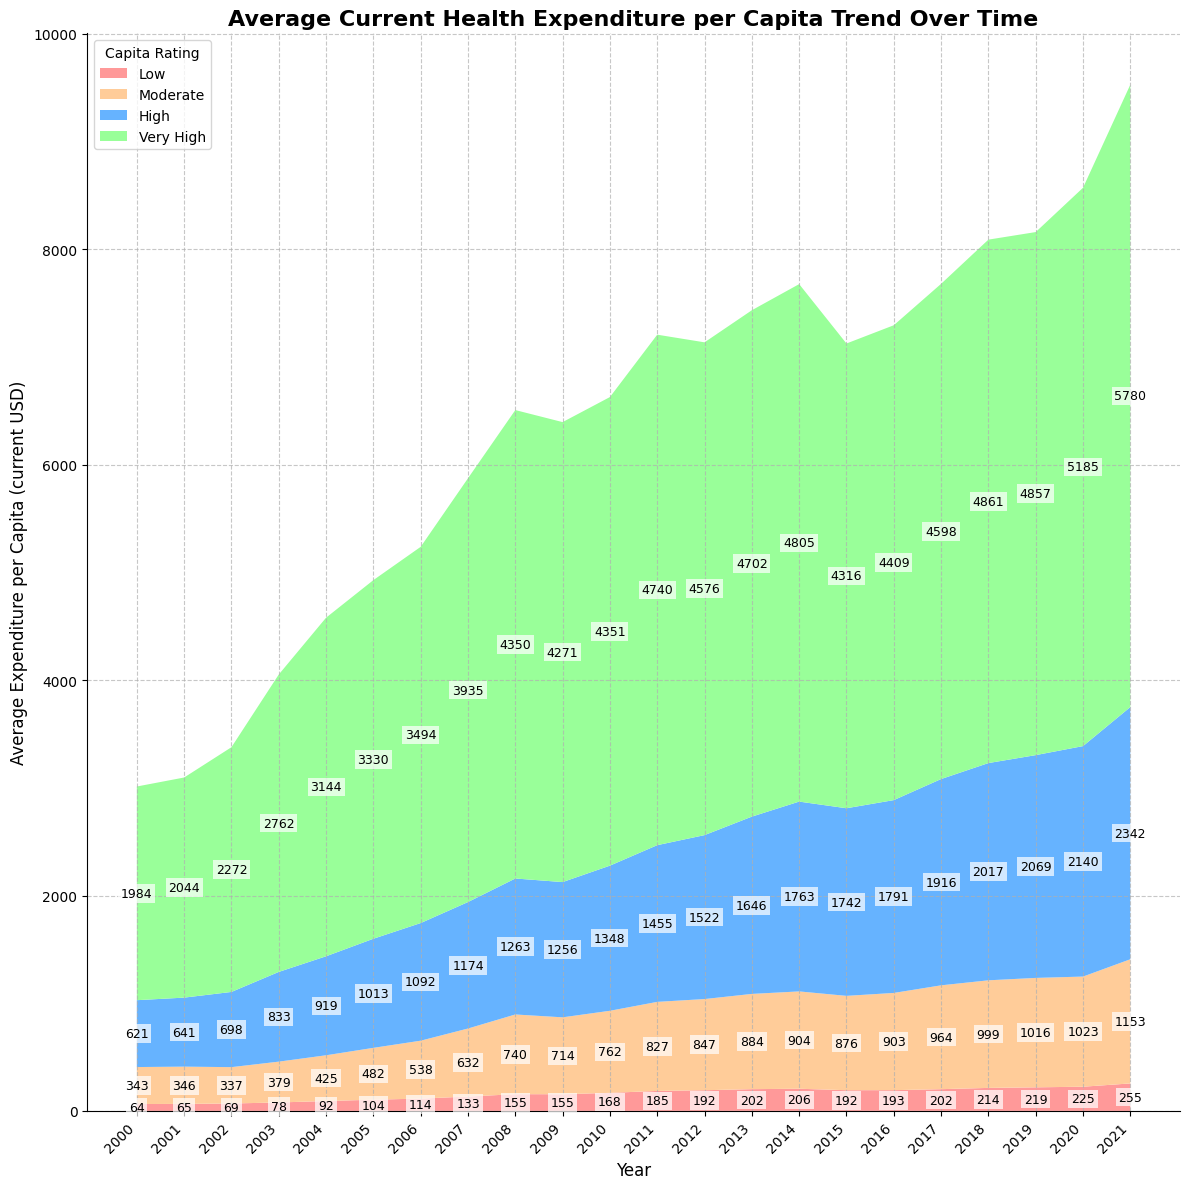

In [154]:
# Select relevant columns (years) and transpose
years = capita_df.columns[1:-2] 
capita_df_t = capita_df.set_index('country_name')[years].transpose()

# Calculate the average GDP percentage for each year and rating
capita_groups = capita_df.groupby('rating_by_capita')[years].mean()

# Reorder the rating categories: Low, Moderate, High, Very High
rating_order = ['Low', 'Moderate', 'High', 'Very High']
capita_groups = capita_groups.reindex(rating_order)

# Create the stackplot
plt.figure(figsize=(12, 12))
plt.stackplot(capita_groups.columns, capita_groups.values,
              labels=capita_groups.index,
              colors=['#ff9999', '#ffcc99', '#66b3ff', '#99ff99'])

# Title and labels
plt.title('Average Current Health Expenditure per Capita Trend Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Expenditure per Capita (current USD)', fontsize=12)

# Customize ticks
plt.xticks(capita_groups.columns, rotation=45, ha='right')
plt.grid(linestyle='--', alpha=0.7)

# Add legend with title
plt.legend(loc='upper left', title='Capita Rating')

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add value labels to the stackplot
for i, rating in enumerate(rating_order):
    for year in years:
        value = capita_groups.loc[rating, year]
        # Find the y-coordinate for the label (middle of the stack)
        bottom_values = capita_groups.iloc[:i, :].sum(axis=0)
        y_coord = bottom_values[year] + value / 2
        plt.text(year, y_coord, f'{value:.0f}', ha='center', va='center', fontsize=9, 
                 bbox={'facecolor': 'white', 'edgecolor': 'none', 'alpha': 0.7, 'pad': 2})

plt.tight_layout()
plt.show()

**4. Stackplot: Average Current Health Expenditure per Capita Trend Over Time**

* This stackplot illustrates the trend of average health expenditure per capita, broken down by capita rating categories.

* The "Low" capita rating category consistently contributes the largest portion to the average expenditure, indicating a persistent gap in per capita health spending between different income groups.

* This visualization directly demonstrates the inequality in health expenditure over time. The dominance of the "Low" category highlights the problem statement and emphasizes the need to address this disparity to achieve SDG 3. The lack of significant change in the relative proportions of the categories suggests that existing efforts may not be effectively closing the gap.

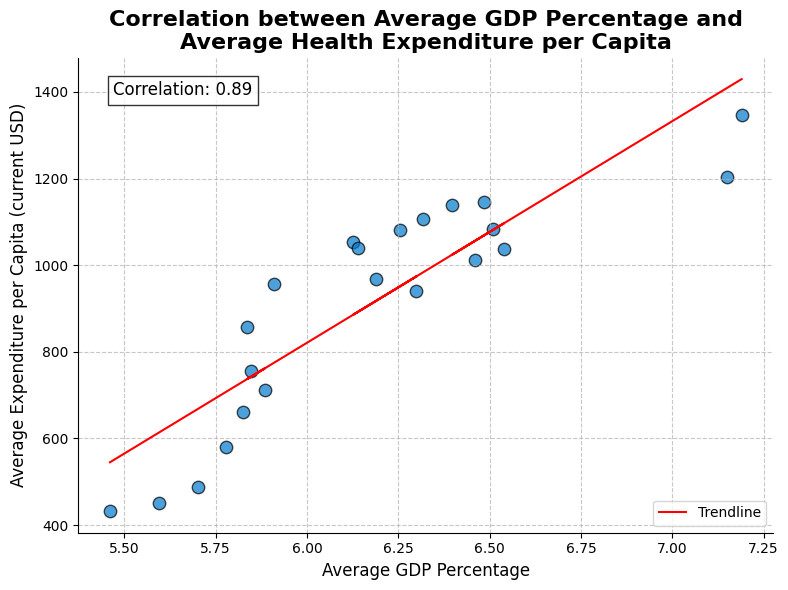

In [155]:
# Extract years and transpose DataFrames
years = gdp_df.columns[1:-2]
gdp_df_t = gdp_df.set_index('country_name')[years].transpose()
capita_df_t = capita_df.set_index('country_name')[years].transpose()

# Calculate average GDP and per capita for each year
average_gdp = gdp_df_t.mean(axis=1)
average_capita = capita_df_t.mean(axis=1)

# Correlation Plot
plt.figure(figsize=(8, 6))
plt.scatter(average_gdp, average_capita, color='#007acc', alpha=0.7, s=80, edgecolors='black')

# Title and labels
plt.title('Correlation between Average GDP Percentage and\nAverage Health Expenditure per Capita', 
          fontsize=16, fontweight='bold')
plt.xlabel('Average GDP Percentage', fontsize=12)
plt.ylabel('Average Expenditure per Capita (current USD)', fontsize=12)

# Add grid lines
plt.grid(linestyle='--', alpha=0.7)

# Add a trendline 
from numpy.polynomial.polynomial import polyfit
b, m = polyfit(average_gdp, average_capita, 1)  # Fit a linear trendline
plt.plot(average_gdp, b + m * average_gdp, '-', color='red', linewidth=1.5, label='Trendline')

# Annotate the correlation coefficient on the plot
correlation = np.corrcoef(average_gdp, average_capita)[0, 1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox={'facecolor': 'white', 'alpha': 0.8})

# Remove spines 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend for the trendline
plt.legend()

plt.tight_layout()
plt.show()

**5. Correlation Plot: Correlation between Average GDP Percentage and Average Health Expenditure per Capita**

* This scatter plot shows the relationship between average GDP percentage and average health expenditure per capita, along with the calculated correlation coefficient.

* There is a strong positive correlation (0.89) between average GDP percentage and average health expenditure per capita, indicating that countries with higher GDP tend to spend more on healthcare.

* This plot reinforces the idea that economic development plays a significant role in health expenditure. It suggests that improving economic conditions in low and middle-income countries could potentially increase their capacity for health spending. However, it's crucial to consider that correlation doesn't imply causation. Other factors besides GDP can influence health expenditure, and policies must be implemented to ensure that economic growth translates into equitable health investments.

## Implications for SDG 3 and Recommendations

**Implications:**

The visualizations reveal a concerning picture of global health expenditure inequalities. Persistent disparities in both per capita spending and the proportion of GDP allocated to healthcare present major challenges to achieving SDG 3:

- Low per capita health expenditure in many countries translates to limited access to essential health services, impacting health outcomes and perpetuating cycles of poverty.
  
- This inequality hinders progress towards achieving SDG 3 targets, such as reducing maternal and child mortality, combating communicable diseases, and promoting mental health.
  
- If left unaddressed, these disparities could lead to widening health gaps between countries and within populations, exacerbating existing inequalities and jeopardizing the goal of "health for all."

**Recommendations and Next Steps:**

- Low and middle-income countries need to prioritize and increase public health funding. This could involve exploring innovative financing mechanisms, improving efficiency in healthcare delivery, and advocating for greater international development assistance.
  
- It's crucial to ensure that increased funding translates into equitable access to healthcare services for all population groups, especially marginalized communities. This requires targeted interventions, strengthened health systems, and policies that address social determinants of health.
  
- Continued monitoring and analysis of health expenditure data are essential to track progress, identify areas requiring attention, and inform policies aimed at reducing inequalities.
  
- Addressing global health expenditure disparities requires collaboration between governments, international organizations, civil society, and the private sector. 

**Conclusion**

- By acknowledging the problem, understanding the underlying factors, and implementing targeted strategies, we can strive to achieve a more just and equitable world where everyone has the opportunity to live a healthy life.

- Thank you for your time!